In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [2]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13) 

In [3]:
print(X.shape) 
print(y.shape) 

(4, 1)
(4,)


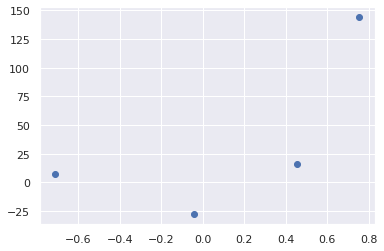

In [4]:
sns.set() 
plt.scatter(X,y)
plt.show() 

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X,y)

LinearRegression()

In [7]:
lr.coef_

array([78.35063668])

In [8]:
lr.intercept_

26.15963284313262

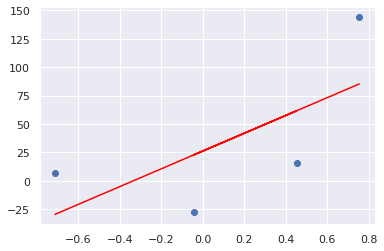

In [9]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red') 

In [10]:
# First let's put b = 0 and see where our line plots
b = 0
y_pred = ((78.35*X) + b).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

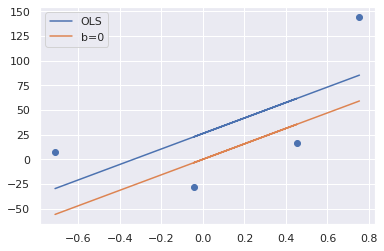

In [11]:
#let's plot these two lines
#plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.plot(X,lr.predict(X),label='OLS')
plt.plot(X,y_pred,label='b=0')
plt.legend() 
plt.show() 

In [12]:
# Now let's put b=100 and see where our line plots
b=100
y_pred1 = ((78.35*X) + b).reshape(4)
y_pred1

array([ 44.18419163, 135.39949674,  96.51318381, 159.05759577])

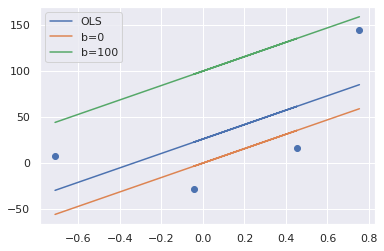

In [13]:
# let's all three lines
#plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.plot(X,lr.predict(X),label='OLS')
plt.plot(X,y_pred,label='b=0')
plt.plot(X,y_pred1,label='b=100')
plt.legend() 
plt.show() 

In [14]:
# Now let calculate the loss slope using differential equ of linear regression 
m = 78.35; b = 0
loss_slope = -2* np.sum(y - m*X.ravel() - b) 
loss_slope

-209.27763408209216

In [15]:
# now let's take learning rate
learning_rate = 0.1
step_size = loss_slope*learning_rate
step_size

-20.927763408209216

In [16]:
# Now let's calculate new b
b = b - step_size
b

20.927763408209216

In [17]:
# Now we have new b let's calculate new y_pred and see where our line plots
y_pred2 = (m*X + b).reshape(4)
y_pred2

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

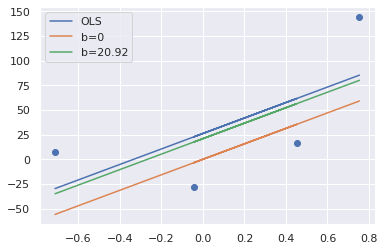

In [18]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),label='OLS')
plt.plot(X,y_pred,label='b=0')
plt.plot(X,y_pred2,label='b=20.92')
plt.legend() 
plt.show() 

In [19]:
# Now let's calculate again for b = 20.92 new value which we get above 
loss_slope1 = -2 * np.sum(y - m*X.ravel() - b)
loss_slope1

-41.85552681641843

In [20]:
# calculateing step_size with new learning rate1*loss_slope1
learning_rate1 = 0.1
step_size1 = learning_rate1*loss_slope1
step_size1

-4.185552681641844

In [21]:
# New value for b
b = b - step_size1
b

25.11331608985106

In [22]:
# now let's again calculate the value for y_pred and let's see where our line will plot
y_pred3 = (m*X + b).reshape(4)
y_pred3

array([-30.70249228,  60.51281283,  21.6264999 ,  84.17091186])

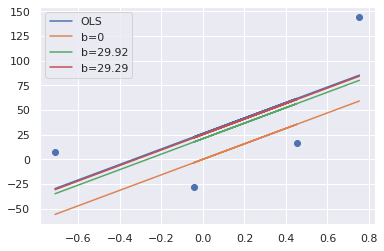

In [23]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),label='OLS')
plt.plot(X,y_pred,label='b=0')
plt.plot(X,y_pred2,label='b=29.92')
plt.plot(X,y_pred3,label='b=29.29')
plt.legend() 
plt.show() 

In [24]:
# Now Let's calculate for one more time 
# value for loss slope
loss_slope2 = -2* np.sum(y - m*X.ravel() - b)
print(loss_slope2)
# value for step size
learning_rate2 = 0.1
step_size2 = learning_rate2*loss_slope2
print(step_size2)
#value for b 
b = b - step_size2
print(b) 

-8.371105363283675
-0.8371105363283675
25.95042662617943


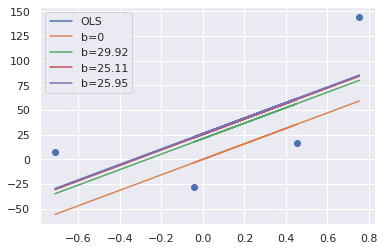

In [25]:
# Now calculate y_pred and let's that finally our line convergence or not 
y_pred4 = (m*X + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),label='OLS')
plt.plot(X,y_pred,label='b=0')
plt.plot(X,y_pred2,label='b=29.92')
plt.plot(X,y_pred3,label='b=25.11')
plt.plot(X,y_pred4,label='b=25.95')
plt.legend() 
plt.show() 

In [26]:
# Now Let's write all the above using for loop
'''epochs = 3
learning_rate_ = 0.1
b_ = 0
m = 78.95
for i in range(epochs):
  loss_slope_ = -2* np.sum(y - m*X.ravel() - b_)
  step_size_ = learning_rate_*loss_slope_
  b_ = b_ - step_size_

  y_pred_ = (m*X + b_).reshape(len(X))
  plt.plot(X,y_pred_,label = b_)
  plt.legend() 

plt.scatter(X,y)
plt.show()
#print(loss_slope_)
#print(step_size_)
#print(b_)'''

'epochs = 3\nlearning_rate_ = 0.1\nb_ = 0\nm = 78.95\nfor i in range(epochs):\n  loss_slope_ = -2* np.sum(y - m*X.ravel() - b_)\n  step_size_ = learning_rate_*loss_slope_\n  b_ = b_ - step_size_\n\n  y_pred_ = (m*X + b_).reshape(len(X))\n  plt.plot(X,y_pred_,label = b_)\n  plt.legend() \n\nplt.scatter(X,y)\nplt.show()\n#print(loss_slope_)\n#print(step_size_)\n#print(b_)'

In [27]:
# Now let's Make CLASS for GD in this class we will only find value of b (intercept) while keeping m (slope) fixed.
class meraGD:
  def __init__(self,Epochs,LearningRate):
    self.Epochs = Epochs
    self.LearningRate = LearningRate
    self.m_ = 78.95
    self.b_ = 0
  
  def fit(self,X,y):
    for i in range(self.Epochs):
      loss_slope_ = -2* np.sum(y - self.m_*X.ravel() - self.b_)
      step_size_ = self.LearningRate*loss_slope_
      self.b_ = self.b_ - step_size_
      #print(loss_slope_,self.b_)
    return self.b_

  def predict(self,X):
    return (self.m_*X + self.b_).reshape(len(X))

In [28]:
GD = meraGD(10,0.01)

In [29]:
GD.fit(X,y)

14.758163553186582

In [30]:
GD.predict(X)

array([-41.48507922,  50.4287477 ,  11.24464552,  74.26801915])

In [31]:
# Now lets's Import the bigger dataset and apply the same above class for it

X1,y1 = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

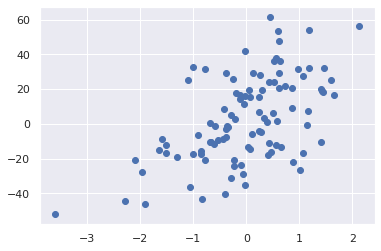

In [32]:
plt.scatter(X1,y1)

In [33]:
#Now let's first calculate the values using sklearn linear regression to comapre with our class later
lr1 = LinearRegression()

In [34]:
lr1.fit(X1,y1)

LinearRegression()

In [35]:
lr1.predict(X)

array([-7.02317652,  9.78022457,  2.6167084 , 14.13844632])

In [36]:
lr1.coef_

array([14.43339441])

In [37]:
lr1.intercept_

3.259038884935119

In [38]:
# Now lets build the above class again for this datasets
class meraGD1:
  def __init__(self,Epochs,LearningRate):
    self.Epochs = Epochs
    self.LearningRate = LearningRate
    self.m_ = 29.56
    self.b_ = -120
  
  def fit(self,X1,y1):
    for i in range(self.Epochs):
      loss_slope_ = -2* np.sum(y1 - self.m_*X1.ravel() - self.b_) 
      step_size_ = self.LearningRate*loss_slope_
      self.b_ = self.b_ - step_size_
      #print(loss_slope_,self.b_)
    return self.b_

  def predict(self,X1):
    return (self.m_*X1 + self.b_).reshape(len(X1))

In [39]:
GD1 = meraGD1(100,0.001)

In [40]:
GD1.fit(X1,y1)

3.4469396828530776

In [41]:
GD1.predict(X1)

array([-7.78890683e+00, -7.49528820e+00, -2.11948247e+01,  4.64099990e+01,
       -5.30468106e+00, -4.13010432e+01,  4.49441595e+01, -1.95426801e+01,
        1.55562421e+01,  5.03878545e+01,  5.06725874e+00,  2.75058644e+00,
       -4.99496458e+00,  1.70894353e+01,  4.70054343e+01,  4.56244392e+01,
        1.62633059e+01,  6.34192988e+00,  2.05755864e+01, -4.14454421e+01,
       -8.92766375e+00,  2.54220713e+00, -2.14739741e+00, -1.67937705e+01,
       -1.93665746e+01,  2.91866257e+01,  2.21896099e+00,  2.15032772e+01,
        4.11046511e+00, -7.75619138e+00,  1.04344658e+01, -3.60256676e+00,
        3.23306614e+01,  3.31487100e+01,  2.24520745e+01,  6.96258155e+00,
       -7.97002288e+00, -8.53601559e+00, -2.64778000e+01,  1.51819493e+01,
        1.82688075e+01,  2.28640177e+01, -1.03239369e+02,  1.34003630e+01,
        2.89193193e+01,  2.18523344e+01, -3.74604821e+00, -2.36904240e+01,
        5.71970161e+00,  5.21980168e+01, -6.40423384e+01, -1.68544363e+01,
        1.55132510e+00,  

In [42]:
#In the above class we have calculate the value of only b while keeping value of m fixed or predetermine ..
#But now we will create the class and calculate the value for m and b both we will write logic for both.

class meraGD2:

  def __init__(self,epochs,learningrate):
    self.epochs = epochs
    self.learningrate = learningrate
    self.m1 = 100
    self.b1 = -120

  def fit(self,X1,y1):
    for i in range(self.epochs):
      loss_slope_b = -2* np.sum(y1 - self.m1* X1.ravel() - self.b1)
      loss_slope_m = -2* np.sum((y1 -self.m1* X1.ravel() - self.b1)* X1.ravel())
      step_size_b = self.learningrate* loss_slope_b
      step_size_m = self.learningrate* loss_slope_m
      self.b1 = self.b1 - step_size_b
      self.m1 = self.m1 - step_size_m
    return self.b1,self.m1

  def predict(self,X1):
    return self.m1* X1 + self.b1

In [43]:
GD2 = meraGD2(100,0.001)

In [44]:
GD2.fit(X1,y1)

(3.2590388728993664, 14.433394500208477)

In [45]:
GD2.predict(X1).ravel()

array([-2.22713857e+00, -2.08377208e+00, -8.77290656e+00,  2.42368056e+01,
       -1.01415445e+00, -1.85902605e+01,  2.35210735e+01, -7.96620645e+00,
        9.17170258e+00,  2.61790910e+01,  4.05019936e+00,  2.91902733e+00,
       -8.62927790e-01,  9.92032175e+00,  2.45275415e+01,  2.38532367e+01,
        9.51694380e+00,  4.67258879e+00,  1.16225204e+01, -1.86607668e+01,
       -2.78316455e+00,  2.81728103e+00,  5.27466673e-01, -6.62398394e+00,
       -7.88021863e+00,  1.58270714e+01,  2.65944818e+00,  1.20754882e+01,
        3.58302143e+00, -2.21116445e+00,  6.67086976e+00, -1.83055428e-01,
        1.73622239e+01,  1.77616562e+01,  1.25387618e+01,  4.97563718e+00,
       -2.31557292e+00, -2.59193273e+00, -1.13524487e+01,  8.98894492e+00,
        1.04961791e+01,  1.27399031e+01, -4.88331663e+01,  8.11904175e+00,
        1.56965525e+01,  1.22459240e+01, -2.53113761e-01, -9.99144409e+00,
        4.36877059e+00,  2.70629471e+01, -2.96942553e+01, -6.65360550e+00,
        2.33345859e+00,  

# We can see that our model and sklearn in-built model our giving the same results.